# Students and Alcohol Consumption 

I choose to analyze [Kaggle’s Student Alcohol Consumption survey](https://www.kaggle.com/uciml/student-alcohol-consumption#student-por.csv) because I am interested in alcohol’s affect on health. This data was conducted among secondary school students in math and Portuguese language courses in Porto, Portugal. The data contains various social, gender, and study information about students in regards to predicting their final grade. 

For this project, we will look at the survey of students in Portuguese language courses. We will also assume that this dataset is a representative sample of the entire student population among the schools and each variable is independent of each other. Although the dataset contains different types of data, the variables we will analyze are measured numerically. This presents a challenge, particularly with the weekday and weekend alcohol consumption variables, as it is subjected to a numeric rating system instead of a concrete number of alcohol intake.   

## Hypotheses

•	Increased alcohol usage during weekdays or weekends increases the likelihood of class failure? 

•	Increased alcohol usage during weekdays or weekends decreases the quality of family relationships?

•	Increased alcohol usage during weekdays or weekends have negative effects on students' health status? 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
%matplotlib inline

In [2]:
data = pd.read_csv("student-por.csv")

In [3]:
# Trim data to focus on key variables 
data_trim = data.loc[:,["failures", "famrel", "Dalc","Walc","health"]]

data_trim.head()

,failures,famrel,Dalc,Walc,health
0,0,4,1,1,3
1,0,5,1,1,3
2,0,4,2,3,3
3,0,3,1,1,5
4,0,4,1,2,5


Weekday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) will be combined as total alcohol consumption. Low alcohol usage will be equivalent to 2 (Dalc = 1, Walc = 1). Increase consumption will be a score of 3 or higher. 

In [4]:
# Create total alcohol usage by combing "Dalc" and "Walc"
data_trim['tacl'] = data_trim["Dalc"] + data_trim["Walc"]

In [5]:
fail_test = (data_trim["tacl"]).groupby(data_trim["failures"]).value_counts()

fail_test.head()

failures  tacl
0         2       207
          3       106
          4        84
          5        60
          6        42
Name: tacl, dtype: int64

In [6]:
# Create low alcohol usage for failures
low_alc = data_trim[((data_trim["Dalc"] == 1) & (data_trim["Walc"] == 1))][["tacl", "failures"]]

low_alc.head()


,tacl,failures
0,2,0
1,2,0
3,2,0
6,2,0
7,2,0


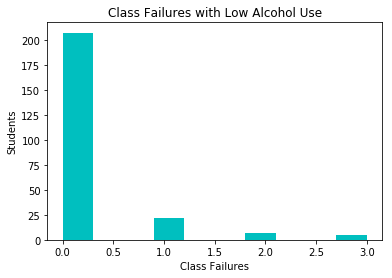

In [7]:
plt.hist(low_alc['failures'], color='c')
plt.xlabel("Class Failures")
plt.ylabel("Students")
plt.title("Class Failures with Low Alcohol Use")
plt.show()

In [8]:
# Create increased alcohol use for failures
inc_alc = data_trim[((data_trim["Dalc"] > 1) & (data_trim["Walc"] > 1))][["tacl","failures"]]

inc_alc.head()

,tacl,failures
2,5,0
18,6,3
23,6,0
27,6,0
29,10,0


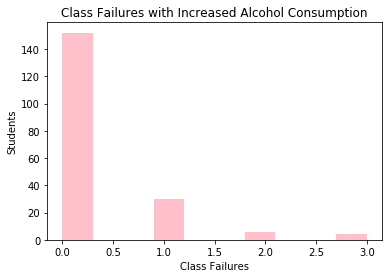

In [9]:
plt.hist(inc_alc['failures'], color='pink')
plt.xlabel("Class Failures")
plt.ylabel("Students")
plt.title("Class Failures with Increased Alcohol Consumption")
plt.show()

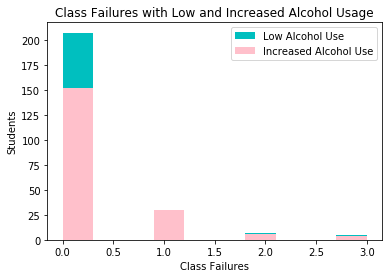

In [10]:
# Compare Class Failures with Low Alcohol Consumption and Increased Alcohol Consumption 

x = low_alc['failures']
y = inc_alc['failures']


plt.hist(x, color='c') 
plt.hist(y, color='pink')
plt.title('Class Failures with Low and Increased Alcohol Usage')
plt.xlabel('Class Failures')
plt.ylabel('Students')
plt.legend(['Low Alcohol Use','Increased Alcohol Use'])

plt.show()

We can see that there is a difference between low and increased alcohol usage in the numbers of class failures. Students with increased alcohol usage reported to have failed more classes than students with low alcohol consumption. 

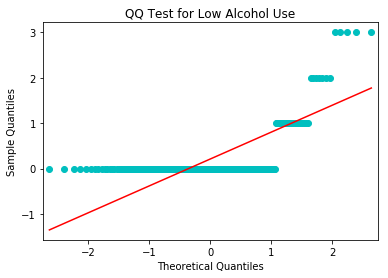

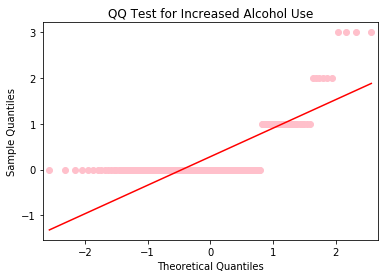

In [11]:
# Check for normality
qqplot(low_alc['failures'], line='s', color='c')
plt.title('QQ Test for Low Alcohol Use')
pyplot.show()

qqplot(inc_alc['failures'], line='s', color='pink')
plt.title('QQ Test for Increased Alcohol Use')
pyplot.show()

The datasets for low and increased alcohol usage is clearly not normal as it do not resemble a line. This suggests that we cannot apply techniques to assume a normal distribution, instead we will use the central limit theorem. With a large sample size, the theorem states that the distribution of the sample means will be normally distributed. 

Text(0.5,1,'Mean Increased Alcohol Use')

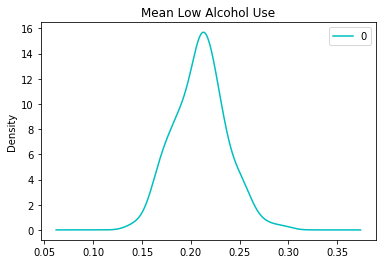

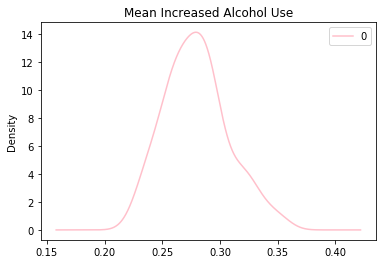

In [15]:
# Make empty list to hold point estimates
point_estimates = []         

# Generate 200 samples
for x in range(200):         
    sample_low_acl = np.random.choice(low_alc['failures'], 500, replace=True)
    point_estimates.append( sample_low_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='c')  
plt.title('Mean Low Alcohol Use')

point_estimates = [] 
                                 
for x in range(200):         
    sample_inc_acl = np.random.choice(inc_alc['failures'], 500, replace=True)
    point_estimates.append( sample_inc_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='pink')  
plt.title('Mean Increased Alcohol Use')

The sampling distribution appears to be roughly normal in a bell shape curve. 

In [16]:
print(sample_low_acl.mean())
print(sample_inc_acl.mean())
print(sample_low_acl.std())
print(sample_inc_acl.std())

# Compute the difference between the two sample means
diff=sample_inc_acl.mean( ) -sample_low_acl.mean()
print(diff)

0.21
0.27
0.5778408085277467
0.6140846847137617
0.060000000000000026


In [17]:
from scipy.stats import ttest_ind
print(ttest_ind(sample_inc_acl, sample_low_acl, equal_var=False))

Ttest_indResult(statistic=1.589522657429272, pvalue=0.11226032680479332)


### Hypothesis 1: 
#### Increased alcohol usage during weekdays or weekends increases the likelihood of class failure?

With p-value greater than 0.05, we reject the hypothesis at a 95% confidence level. Increased alcohol usage does not effect the likelihood of class failure. 

Now we will examine how increased alcohol usgage effects the quality of family relationship. 

In [18]:
famrel_test = (data_trim["tacl"]).groupby(data_trim["famrel"]).value_counts()

fail_test.head()

failures  tacl
0         2       207
          3       106
          4        84
          5        60
          6        42
Name: tacl, dtype: int64

Quality of family relationships (famrel) is measured by a numeric scale from 1 (very bad) to 5 (excellent).

In [19]:
# Create low alcohol use for famrel
low_alc = data_trim[((data_trim["Dalc"] == 1) & (data_trim["Walc"] == 1))][["tacl", "famrel"]]

low_alc.head()


,tacl,famrel
0,2,4
1,2,5
3,2,3
6,2,4
7,2,4


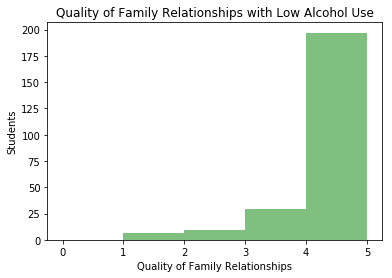

In [20]:
plt.hist(low_alc['famrel'], color='green', bins=np.arange(0, 6), alpha=.5)
plt.xlabel("Quality of Family Relationships")
plt.ylabel("Students")
plt.title("Quality of Family Relationships with Low Alcohol Use")
plt.show()

In [21]:
# Create increased alcohol use for famrel
inc_alc = data_trim[((data_trim["Dalc"] > 1) & (data_trim["Walc"] > 1))][["tacl", "famrel"]]

inc_alc.head()


,tacl,famrel
2,5,4
18,6,5
23,6,5
27,6,2
29,10,4


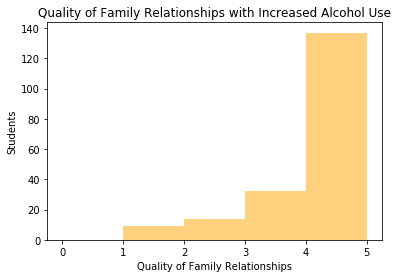

In [22]:
plt.hist(inc_alc['famrel'], color='orange', bins=np.arange(0, 6), alpha=.5)
plt.xlabel("Quality of Family Relationships")
plt.ylabel("Students")
plt.title("Quality of Family Relationships with Increased Alcohol Use")
plt.show()

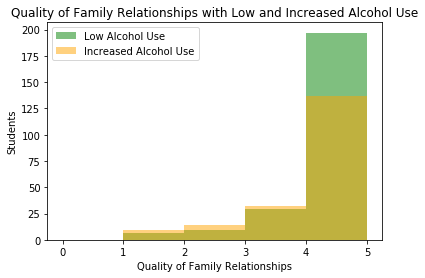

In [23]:
# Comparing Quality of Family Relationships with Low Alcohol Consumption and Increased Alcohol Consumption 

x = low_alc['famrel']
y = inc_alc['famrel']


plt.hist(x, color='green', bins=np.arange(0, 6), alpha=.5) 
plt.hist(y, color='orange', bins=np.arange(0, 6), alpha=.5)
plt.title('Quality of Family Relationships with Low and Increased Alcohol Use')
plt.xlabel('Quality of Family Relationships')
plt.ylabel('Students')
plt.legend(['Low Alcohol Use','Increased Alcohol Use'])

plt.show()

Students with low alcohol usage appears to have rate the quality of family relationships higher than students with increased alcohol consumption. 

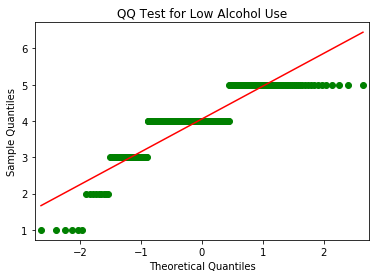

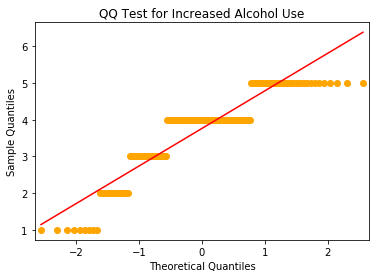

In [24]:
# Check for normality 

qqplot(low_alc['famrel'], line='s', color='green')
plt.title('QQ Test for Low Alcohol Use')
pyplot.show()

qqplot(inc_alc['famrel'], line='s', color='orange')
plt.title('QQ Test for Increased Alcohol Use')
pyplot.show()

Again, neither low nor increased alcohol usage are normally distributed. The datasets are likely skewed towards the right. 

Text(0.5,1,'Mean Increased Alcohol Use')

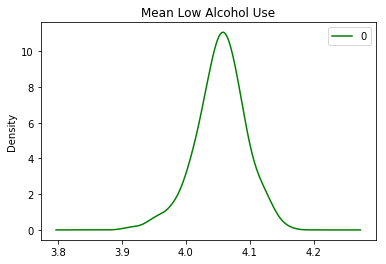

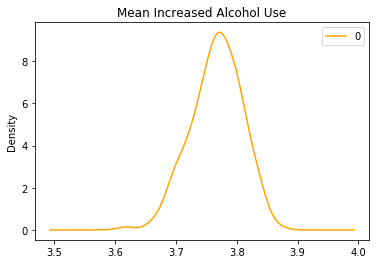

In [25]:
# Plot sample means
point_estimates = []         

for x in range(200):         
    sample_low_acl = np.random.choice(low_alc['famrel'], 500, replace=True)
    point_estimates.append( sample_low_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='green')  
plt.title('Mean Low Alcohol Use')

point_estimates = [] 
                                 
for x in range(200):         
    sample_inc_acl = np.random.choice(inc_alc['famrel'], 500, replace=True)
    point_estimates.append( sample_inc_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='orange')  
plt.title('Mean Increased Alcohol Use')

In [26]:
print(sample_low_acl.mean())
print(sample_inc_acl.mean())
print(sample_low_acl.std())
print(sample_inc_acl.std())

# Compute the difference between the two sample means
diff=sample_inc_acl.mean( ) -sample_low_acl.mean()
print(diff)

4.03
3.8
0.9149316914393117
1.0639548862616308
-0.23000000000000043


In [27]:
from scipy.stats import ttest_ind
print(ttest_ind(sample_inc_acl, sample_low_acl, equal_var=False))

Ttest_indResult(statistic=-3.661375091937688, pvalue=0.00026432746286879274)


### Hypothesis 2: 
#### Increased alcohol usage during weekdays or weekends decreases the quality of family relationships?

We can say the hypothesis is true at the 99.5% confidence level since the p-value is close to 0.00. Increased alcohol consumption does effect the quality of family relationships.

Lastly, we will take a look at the effects of alcohol consumption on students' health status. 

In [28]:
famrel_test = (data_trim["tacl"]).groupby(data_trim["health"]).value_counts()

fail_test.head()

failures  tacl
0         2       207
          3       106
          4        84
          5        60
          6        42
Name: tacl, dtype: int64

Current health status is measured by a numerical scale from 1 (very bad) to 5 (very good).

In [29]:
# Create low alcohol use for health
low_alc = data_trim[((data_trim["Dalc"] == 1) & (data_trim["Walc"] == 1))][["tacl", "health"]]

low_alc.head()

,tacl,health
0,2,3
1,2,3
3,2,5
6,2,3
7,2,1


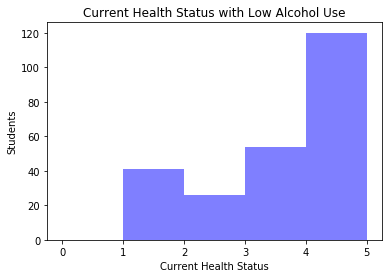

In [30]:
plt.hist(low_alc['health'], color='b', bins=np.arange(0, 6), alpha=.5)
plt.xlabel("Current Health Status")
plt.ylabel("Students")
plt.title("Current Health Status with Low Alcohol Use")
plt.show()

In [31]:
# Create increased alcohol use for health
inc_alc = data_trim[((data_trim["Dalc"] > 1) & (data_trim["Walc"] > 1))][["tacl", "health"]]

inc_alc.head()

,tacl,health
2,5,3
18,6,5
23,6,5
27,6,1
29,10,5


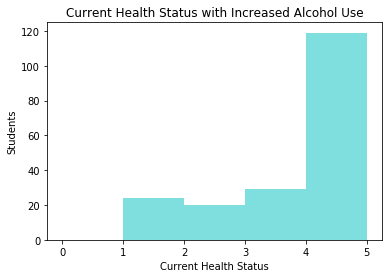

In [32]:
plt.hist(inc_alc['health'], color='c', bins=np.arange(0, 6), alpha=.5)
plt.xlabel("Current Health Status")
plt.ylabel("Students")
plt.title("Current Health Status with Increased Alcohol Use")
plt.show()

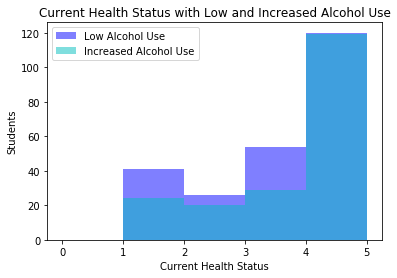

In [33]:
# Comparing Current Health Status with Low Alcohol Consumption and Increased Alcohol Consumption 

x = low_alc['health']
y = inc_alc['health']


plt.hist(x, color='b', bins=np.arange(0, 6), alpha=.5) 
plt.hist(y, color='c', bins=np.arange(0, 6), alpha=.5)
plt.title('Current Health Status with Low and Increased Alcohol Use')
plt.xlabel('Current Health Status')
plt.ylabel('Students')
plt.legend(['Low Alcohol Use','Increased Alcohol Use'])

plt.show()

On the surface, students with increased alcohol usage tend to identify with a lower rating of current health status than students with low alcohol consumption. 

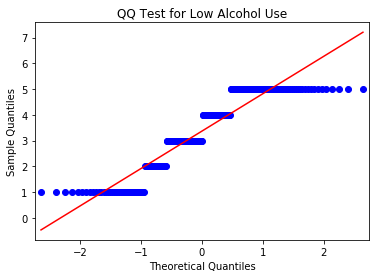

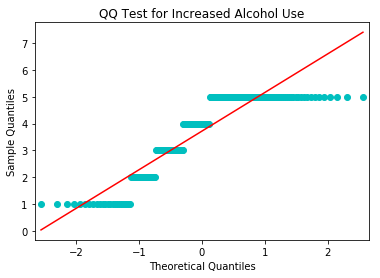

In [34]:
# Check for normality 

qqplot(low_alc['health'], line='s', color='b')
plt.title('QQ Test for Low Alcohol Use')
pyplot.show()

qqplot(inc_alc['health'], line='s', color='c')
plt.title('QQ Test for Increased Alcohol Use')
pyplot.show()

Both low and increased alcohol use are not normally distributed. 

Text(0.5,1,'Mean Increased Alcohol Use')

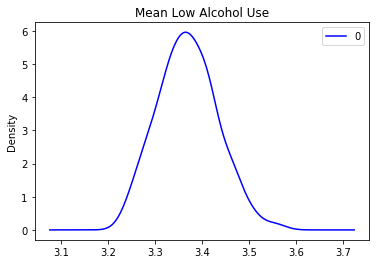

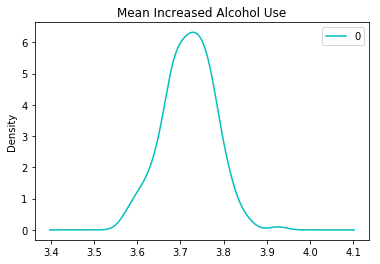

In [35]:
# Plot sample means
point_estimates = []         

for x in range(200):         
    sample_low_acl = np.random.choice(low_alc['health'], 500, replace=True)
    point_estimates.append( sample_low_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='b')  
plt.title('Mean Low Alcohol Use')

point_estimates = [] 
                                 
for x in range(200):         
    sample_inc_acl = np.random.choice(inc_alc['health'], 500, replace=True)
    point_estimates.append( sample_inc_acl.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density", color='c')  
plt.title('Mean Increased Alcohol Use')

In [36]:
print(sample_low_acl.mean())
print(sample_inc_acl.mean())
print(sample_low_acl.std())
print(sample_inc_acl.std())

# Compute the difference between the two sample means
diff=sample_inc_acl.mean( ) -sample_low_acl.mean()
print(diff)

3.314
3.672
1.4475510353697378
1.4711954322930723
0.3580000000000001


In [37]:
from scipy.stats import ttest_ind
print(ttest_ind(sample_inc_acl, sample_low_acl, equal_var=False))

Ttest_indResult(statistic=3.87469636517338, pvalue=0.00011372524794945601)


### Hypothesis 3: 
#### Increased alcohol usage during weekdays or weekends have negative effects on students' health status?

The data does support the hypothesis at a 99.5% confidence level that increased alcohol usage negatively effects the health status of students. 

### Conclusion

Based on the analysis, we can conclude the following:

•	Increased alcohol usage during weekdays or weekends does not effect the likelihood of class failure.

•	Increased alcohol usage during weekdays or weekends decreases the quality of family relationships.

•	Increased alcohol usage during weekdays or weekends decreases the current health status of students.

With the following information, I would recommend quantifying the amount of alcohol consumption over a semester to predict students final grade. 